<h1 align="center">Used Car Price Prediction</h1> 

<h3 align="center">Linear Regression</h3> 

---------------------------------------------------------------------------------------------------------------------------

### Importing Relevent library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the data
car = pd.read_csv('data\Car_preproccesed.csv')

car.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression


In [5]:
# Declareig the feature and target variable
X = car.drop('log_price', axis=1)
y = car['log_price']

X.shape, y.shape

((3867, 17), (3867,))

### Scaling the data


Note: It is not alwayes consider best practics to scale the dummy variable.beause once they scale they lose all the information. but here I will  neglect that. and will consider every column are seperate features.

In [6]:
from sklearn.preprocessing import StandardScaler

# create instance of scaler
scaler = StandardScaler()

# scaling the data
X_scaled = scaler.fit_transform(X)

X_scaled


array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [7]:
# checking the first row of scaling data.
X_scaled[0] # here i can see that all dummies `0` and `1` are gone.

array([ 1.2179077 , -0.47452478,  2.27971827, -0.49255381, -0.29105409,
       -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        1.27905896, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
        1.33267512,  0.32137366])

### train_test_split


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 17), (3093,), (774, 17), (774,))

In [9]:
# Creating the regression 
from sklearn.linear_model import LinearRegression

# create instane of model
reg = LinearRegression()

# fit the datab
model = reg.fit(X_train, y_train)

In [ ]:
model.pre

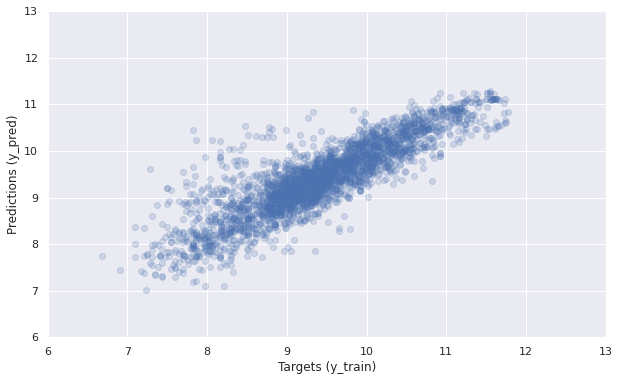

In [19]:
# Evaluate the base Linear regression model

# check the prediction with the original values
y_pred_train = reg.predict(X_train)
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.xlim(6,13);
plt.ylim(6,13);

The traning prediction looks good, it is not completely random, i can observe the linearity on the plot

Another way to check the `Residual` which is difference between thetargets and the predictions.

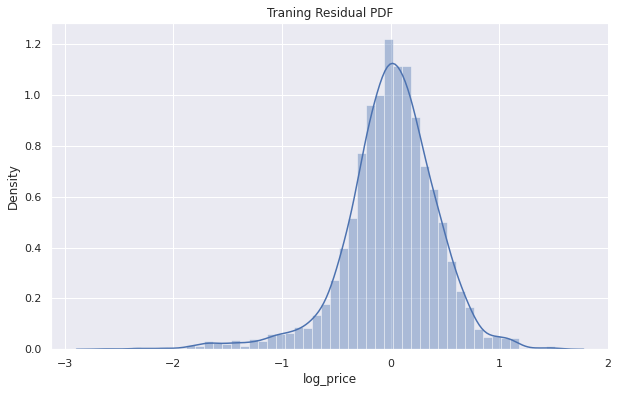

In [17]:
# plotting the distribution of the residual
residual_train = (y_train - y_pred_train)

# ploting the distribution of the residual
plt.figure(figsize=(10,6))
sns.distplot(residual_train);
plt.title('Traning Residual PDF');

From this plot i can observe that the most of the value are lie on the near `0` as the mean is `0` i meaas the model is worked better, as most of the difference is `0`, the model is make the prediction as it is on the target value.

In [20]:
# Checking the r2_score
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.7572893585761237

In [43]:
# Checkinht the rmse
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))

10165.941028678857

The min and max price was `800` and `129222` on the data set and our model make error `10165`. 

The model i have created is not excelent but also not that much bad.

Our model is defining 75% of the variability from the data.

### Now i will look at the weight and bias


In [21]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.462515
1,EngineV,0.213625
2,Brand_BMW,0.025071
3,Brand_Mercedes-Benz,0.023430
4,Brand_Mitsubishi,-0.128286
5,Brand_Renault,-0.174282
6,Brand_Toyota,-0.048213
7,Brand_Volkswagen,-0.077236
8,Body_hatch,-0.147790
9,Body_other,-0.103041


Now this will be not a generalize model because i violate a rule by scaling the dummy variable, but here i will explane the weights what i have got.

`positive_weights` = feature increase value also the price will be increase.

`negative_weights` = feature increase value but the price will decrease.

## Now evaluate on Testing data

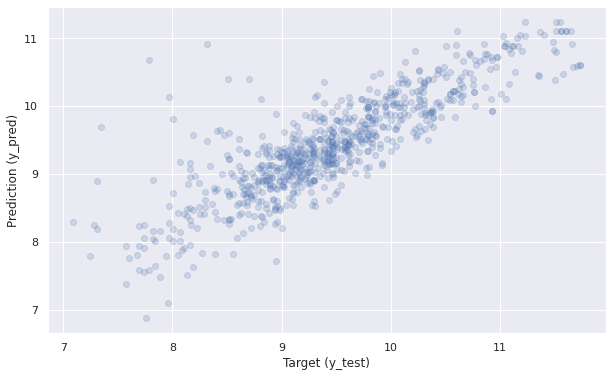

In [31]:
# predict on test data

y_pred = reg.predict(X_test)

# potting the graph
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.2);

plt.xlabel('Target (y_test)');
plt.ylabel('Prediction (y_pred)');

In [44]:
# checking the rmse on test data
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

11692.28821174843

On test data it make `11692` error, this is telling that the model can be performed not that good but it is also not overfit as it behave same on traning and testing data

In [34]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction']) # np.exp will reverse the log_tranformation 
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = np.exp(y_test)

# checking the performance data 
df_eval

,Prediction,Tareget
0,18328.250265,19000.0
1,5256.283391,5500.0
2,22185.025441,19200.0
3,10102.190466,11900.0
4,4000.490570,7750.0
...,...,...
769,39166.491984,116500.0
770,6060.759191,13200.0
771,15649.805091,27500.0
772,11164.302749,16500.0


In [35]:
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)

# checking the data performance
df_eval

,Prediction,Tareget,Residual,Difference%
0,18328.250265,19000.0,671.749735,3.535525
1,5256.283391,5500.0,243.716609,4.431211
2,22185.025441,19200.0,-2985.025441,15.547008
3,10102.190466,11900.0,1797.809534,15.107643
4,4000.490570,7750.0,3749.509430,48.380767
...,...,...,...,...
769,39166.491984,116500.0,77333.508016,66.380694
770,6060.759191,13200.0,7139.240809,54.085158
771,15649.805091,27500.0,11850.194909,43.091618
772,11164.302749,16500.0,5335.697251,32.337559


Now this table tell a lot.

In [37]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16194.846830,18602.017829,2407.171000,39.109058
std,13265.843148,20139.559184,11449.213563,97.373331
min,964.002758,1200.000000,-50811.547159,0.101011
25%,7763.585673,7500.000000,-1827.305347,11.626478
50%,11715.376533,11900.000000,499.370435,22.999212
75%,20275.681146,20999.060000,3512.480615,39.073044
max,76339.579559,125000.000000,84484.674575,1715.173190


In [38]:
# getting all values.
pd.options.display.max_rows = 999
# setting all value two digits after dot.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eval.sort_values(by=['Difference%'])

,Prediction,Tareget,Residual,Difference%
411,22477.27,22500.00,22.73,0.10
633,12913.53,12900.00,-13.53,0.10
437,10818.26,10800.00,-18.26,0.17
522,23245.83,23200.00,-45.83,0.20
91,11525.19,11500.00,-25.19,0.22
589,7028.32,6999.00,-29.32,0.42
664,61761.13,61500.00,-261.13,0.42
446,9252.34,9200.00,-52.34,0.57
322,9239.70,9300.00,60.30,0.65
119,14901.42,15000.00,98.58,0.66


The Note here is the higher difference is on the lower price car. as i can see the residual are all negative. means the model is predicted far away from the original value. as i observe on the `Residual` PDF plot the tail was on the negative side. this is more tabular version of that.

It is telling me the i have missing something that the price of the car is lower but my model think it will be higher.

It can be becaus the `Model` column that i removed in intial stage. or maby the car is broken but that information i dont have.

The next thing is creating another model and keep the `Model` Column